#**Keystroke Dynamics on Mobile Devices Varying with Time**




###Importing required libraries

In [2]:
#import required libraries
import os
import pandas as pd
import numpy as np
import datetime
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates


**Required Functions**

In [3]:
# pickle functions
#for reading pickle file
def read_pickle(filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'rb') as file:
     unpickler = pickle.Unpickler(file)
     df = pickle.load(file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))
  return df
  
#to write into a pickle file
def write_pickle(df,filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'wb') as file:
    pickle.dump(pd.DataFrame(df), file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))


In [4]:
#function to get different time slot
def getTimeSlot(event_time):
  if event_time in range(8,12):
    return 'Morning'
  elif event_time in range(12,15):
    return 'Noon'
  elif event_time in range(15,18):
    return 'After Noon'
  elif event_time in range(18,21):
    return 'Dinner'
  elif event_time in range(21,24):
    return 'Evening'
  elif event_time in range(0,8):
    return 'Night'

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# mounting a specific directory on my google drive for data storage and retrieval
os.chdir("/content/drive/My Drive/Practicum/")
!ls


Mounted at /content/drive
'Colab Notebooks'
 CSV
 Dailywise_DwellTime_FlightTime.jpeg
 db_backups
 Ethics-Notification-Form-Computing-November-2020.docx
'Language Logger -Logging Details.pptx'
'Manual for set up language logger app backend application on windows.gdoc'
 Month_DwellTime_FlightTime.jpeg
 Pickle
 plotly_gantt_chart-main
 reseachIMELogging.html
 reseachIMELogging.mp4
 ResearchIME
 Timeslot_DwellTime_FlightTime.jpeg
 WeekDays_DwellTime_FlightTime.jpeg


In [ ]:
#read specific columns from CSV file 
col_list = ["user_uuid", "timestamp","type"]
#df_event = pd.read_csv("CSV/event_25_06_2021.csv", usecols=col_list)
df_event = pd.read_csv("CSV/event_usr_meenu_26_07_2021.csv", usecols=col_list)
df_event.head(10)

,type,user_uuid,timestamp
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263445371
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263445373
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263481400
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263481460
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263482243
5,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263482301
6,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263483233
7,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263483258
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263483597
9,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263483624


In [ ]:
#rename column name 'type' to 'event_type' 
df_event.rename(columns = {'type' :'event_type'}, inplace = True)
df_event.head(10)

,event_type,user_uuid,timestamp
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263445371
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263445373
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263481400
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263481460
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263482243
5,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263482301
6,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263483233
7,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263483258
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263483597
9,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263483624


In [ ]:
#to find unique event type
df_event.event_type.unique()

array(['TOUCH_DOWN', 'TOUCH_UP'], dtype=object)

In [ ]:
#total no of touch_down events
touch_down_cnt=df_event.event_type.value_counts().TOUCH_DOWN
touch_down_cnt

77770

In [ ]:
touch_up_cnt=df_event.event_type.value_counts().TOUCH_UP
touch_up_cnt

77653

In [ ]:
diff=touch_down_cnt-touch_up_cnt
diff

117

In [ ]:
#convert epoc time to local time zone date time
#The timezone  for both selected user's  and code executed in Ireland and so no need to change time zone
df_event['timestamp']=pd.to_datetime(df_event['timestamp'],unit='ms') 
df_event
#df_event.timestamp.dtype

,event_type,user_uuid,timestamp
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.371
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.373
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.400
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.460
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243
...,...,...,...
155418,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.019
155419,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.154
155420,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.235
155421,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:06.038


In [ ]:
#find out invalid rows( invalid cosecuitive events are :touch_up-touch_up,touch_down-touch_down,touch_up-touch_down)
#assign id to valid events(valid consecutive events are: touch_down and touch_up)
#find dwell time and flight ime for valid events
df_event['event_id']=0
df_event['event_end_time']=0
#df_event['dwell_time']=df_event['dwell_time_ms']=df_event['flight_time']=df_event['flight_time_ms']=0
#df_event['is_paused']=False
#df_event['is_valid']=True
event_cnt=0;
df_len=len(df_event)
for i in range(df_len) :
  if (df_event.loc[i,'event_type']=="TOUCH_DOWN"):
   if (df_event.loc[i+1,'event_type']=="TOUCH_UP"):
     event_cnt+= 1 
     #assign event id
     df_event.loc[i,'event_id']= df_event.loc[i+1,'event_id']=event_cnt 
     df_event.loc[i,'event_end_time']=df_event.loc[i+1,'timestamp']

     #########Dwell Time and Flight Time Calculation################
     #calculate dwell time  
     #if (i+1<df_len):   
      #dwell_time= datetime.datetime.strptime(df_event.loc[i+1,'event_time'],'%H:%M:%S:%f') - datetime.datetime.strptime(df_event.loc[i,'event_time'],'%H:%M:%S:%f') 
      #dwell_time= df_event.loc[i+1,'timestamp'] - df_event.loc[i,'timestamp']     
      #df_event.loc[i,'dwell_time']=dwell_time
      #calculate dwell time in milli sec
      #dwell_time_ms=dwell_time.total_seconds()*1000
      #df_event.loc[i,'dwell_time_ms']=dwell_time_ms 
     #calculate flight time 
     #if (i>1) :  
      #if (df_event.loc[i,'event_type']=="TOUCH_DOWN"):
        #if (df_event.loc[i-1,'event_type']=="TOUCH_UP"):
          #flight_time=df_event.loc[i,'timestamp'] - df_event.loc[i-1,'timestamp']        
          #df_event.loc[i,'flight_time']=flight_time
          #calculate flight time in milli sec
          #flight_time_ms=flight_time.total_seconds()*1000
          #df_event.loc[i,'flight_time_ms']=flight_time_ms
          #if flight less than or equal to 1sec means continuous session otherwise there exist some pauese (assumption)
          #if (flight_time_ms>=1000):
            #df_event.loc[i,'is_paused']=True  
      ######### EOC Dwell Time and Flight Time Calculation################
   #else:
     #df_event.loc[i,'is_valid']=False
     #drop invalid rows
      #df_event = df_event.drop(i)     
  #print(event_cnt)
df_event

,event_type,user_uuid,timestamp,event_id,event_end_time
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.371,1,2021-02-02 10:57:25.373000
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.373,1,0
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.400,2,2021-02-02 10:58:01.460000
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.460,2,0
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,3,2021-02-02 10:58:02.301000
...,...,...,...,...,...
155418,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.019,77403,0
155419,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.154,77404,2021-07-26 21:36:05.235000
155420,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.235,77404,0
155421,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:06.038,77405,2021-07-26 21:36:06.162000


In [ ]:
#rename column name 'timestamp' to 'event_start_time' 
df_event.rename(columns = {'timestamp' :'event_start_time'}, inplace = True)
df_event

,event_type,user_uuid,event_start_time,event_id,event_end_time
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.371,1,2021-02-02 10:57:25.373000
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.373,1,0
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.400,2,2021-02-02 10:58:01.460000
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.460,2,0
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,3,2021-02-02 10:58:02.301000
...,...,...,...,...,...
155418,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.019,77403,0
155419,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.154,77404,2021-07-26 21:36:05.235000
155420,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.235,77404,0
155421,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:06.038,77405,2021-07-26 21:36:06.162000


In [ ]:
#filter by event_type=touch_dwon(start event)
df_event= df_event.query('event_type=="TOUCH_DOWN" and event_id != 0').loc[:,:]  #loc will allocate memory for query result
df_event

,event_type,user_uuid,event_start_time,event_id,event_end_time
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.371,1,2021-02-02 10:57:25.373000
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.400,2,2021-02-02 10:58:01.460000
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,3,2021-02-02 10:58:02.301000
6,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,4,2021-02-02 10:58:03.258000
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,5,2021-02-02 10:58:03.624000
...,...,...,...,...,...
155413,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,77401,2021-07-26 21:36:04.396000
155415,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,77402,2021-07-26 21:36:04.721000
155417,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,77403,2021-07-26 21:36:05.019000
155419,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.154,77404,2021-07-26 21:36:05.235000


In [ ]:
# setting event id as index column
df_event.set_index("event_id", inplace = True,drop=True)
#reset index
#df_event.reset_index(inplace=True)
df_event




,event_type,user_uuid,event_start_time,event_end_time
event_id,,,,
1,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.371,2021-02-02 10:57:25.373000
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.400,2021-02-02 10:58:01.460000
3,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000
5,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000
...,...,...,...,...
77401,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000
77402,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000
77403,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,2021-07-26 21:36:05.019000


In [ ]:
df_event.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            77396, 77397, 77398, 77399, 77400, 77401, 77402, 77403, 77404,
            77405],
           dtype='int64', name='event_id', length=77405)

In [ ]:
#df_event.loc[645,'event_end_time']  
#df_event.loc[646,'event_start_time']
time_difference=df_event.loc[646,'event_start_time'] - df_event.loc[645,'event_end_time'] #Timedelta('0 days 00:01:19.421000')
time_sec=time_difference.total_seconds() #in sec   79.421
time_ms= time_sec*1000  #in milli sec 79421.0
time_ms

In [ ]:
#find dwell time  and flight time 
df_event['dwell_time']=df_event['dwell_time_ms']=df_event['flight_time']=df_event['flight_time_ms']=0
df_event['is_paused']=False
df_len=len(df_event)
for i in range(df_len) :
  if(i>0):
    dwell_time=df_event.loc[i,'event_end_time'] - df_event.loc[i,'event_start_time'] 
    df_event.loc[i,'dwell_time']=dwell_time
    #calculate flight time in milli sec
    dwell_time_ms=dwell_time.total_seconds()*1000
    df_event.loc[i,'dwell_time_ms']=dwell_time_ms
    #if dwell_time less than or equal to 1sec means continuous session otherwise there exist some pauese (assumption)
    if (dwell_time_ms>=1000):
     df_event.loc[i,'is_paused']=True 
  if (i>1):
    flight_time=df_event.loc[i,'event_start_time'] - df_event.loc[i-1,'event_end_time'] 
    df_event.loc[i,'flight_time']=flight_time
    #calculate flight time in milli sec
    flight_time_ms=flight_time.total_seconds()*1000
    df_event.loc[i,'flight_time_ms']=flight_time_ms
    #if flight time less than or equal to 1sec means continuous session otherwise there exist some pauese (assumption)
    if (flight_time_ms>=1000):
     df_event.loc[i,'is_paused']=True 
df_event

,event_type,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,is_paused
event_id,,,,,,,,,
1,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.371,2021-02-02 10:57:25.373000,0 days 00:00:00.002000,2.0,0,0.0,False
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.400,2021-02-02 10:58:01.460000,0 days 00:00:00.060000,60.0,0 days 00:00:36.027000,36027.0,True
3,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,False
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,False
5,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,False
...,...,...,...,...,...,...,...,...,...
77401,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0,False
77402,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0,False
77403,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,2021-07-26 21:36:05.019000,0 days 00:00:00.106000,106.0,0 days 00:00:00.192000,192.0,False


In [ ]:
#fillter df with flight time less than 1 seconds
df_event= df_event.query('is_paused==False ').loc[:,:]  #loc will allocate memory for query result
df_event

,event_type,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,is_paused
event_id,,,,,,,,,
1,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.371,2021-02-02 10:57:25.373000,0 days 00:00:00.002000,2.0,0,0.0,False
3,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,False
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,False
5,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,False
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,False
...,...,...,...,...,...,...,...,...,...
77401,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0,False
77402,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0,False
77403,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,2021-07-26 21:36:05.019000,0 days 00:00:00.106000,106.0,0 days 00:00:00.192000,192.0,False


In [ ]:
#find the count of events with flight_time_ms<0
len(df_event.query('flight_time_ms<0 '))

123

In [ ]:
#fillter df with flight_time_ms>0 
df_event= df_event.query('flight_time_ms>0 ').loc[:,:]  #loc will allocate memory for query result
df_event

,event_type,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,is_paused
event_id,,,,,,,,,
3,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,False
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,False
5,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,False
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,False
12,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,False
...,...,...,...,...,...,...,...,...,...
77400,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.039,2021-07-26 21:36:04.122000,0 days 00:00:00.083000,83.0,0 days 00:00:00.230000,230.0,False
77401,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0,False
77402,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0,False


In [ ]:
#find the count of events with dwell_time_ms<0
len(df_event.query('dwell_time_ms<0 '))

38

In [ ]:
#fillter df with dwell_time_ms>0 
df_event= df_event.query('dwell_time_ms>0 ').loc[:,:]  #loc will allocate memory for query result
df_event

,event_type,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,is_paused
event_id,,,,,,,,,
3,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,False
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,False
5,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,False
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,False
12,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,False
...,...,...,...,...,...,...,...,...,...
77400,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.039,2021-07-26 21:36:04.122000,0 days 00:00:00.083000,83.0,0 days 00:00:00.230000,230.0,False
77401,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0,False
77402,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0,False


In [ ]:
#reset index
df_event.reset_index(inplace=True,drop=True)
df_event

,event_type,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,is_paused
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,False
1,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,False
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,False
3,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,False
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,False
...,...,...,...,...,...,...,...,...,...
69492,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.039,2021-07-26 21:36:04.122000,0 days 00:00:00.083000,83.0,0 days 00:00:00.230000,230.0,False
69493,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0,False
69494,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0,False
69495,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,2021-07-26 21:36:05.019000,0 days 00:00:00.106000,106.0,0 days 00:00:00.192000,192.0,False


In [ ]:
df_event.index

RangeIndex(start=0, stop=69497, step=1)

In [ ]:
#drop event_type column
df_event=df_event.drop(['event_type','is_paused'],axis=1)
df_event

,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms
0,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0
1,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0
2,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0
3,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0
4,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0
...,...,...,...,...,...,...,...
69492,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.039,2021-07-26 21:36:04.122000,0 days 00:00:00.083000,83.0,0 days 00:00:00.230000,230.0
69493,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0
69494,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0
69495,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,2021-07-26 21:36:05.019000,0 days 00:00:00.106000,106.0,0 days 00:00:00.192000,192.0


In [ ]:
#Add a new column 'event_date' by extracting date from timstamp 
df_event['event_date']=pd.to_datetime(df_event['event_start_time']).dt.strftime('%d-%m-%Y')
df_event.head(10)

,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date
0,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021
1,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021
2,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021
3,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021
4,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021
5,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:45.028,2021-02-02 11:03:45.115000,0 days 00:00:00.087000,87.0,0 days 00:00:00.248000,248.0,02-02-2021
6,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:46.341,2021-02-02 11:03:46.405000,0 days 00:00:00.064000,64.0,0 days 00:00:00.143000,143.0,02-02-2021
7,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:46.728,2021-02-02 11:03:46.851000,0 days 00:00:00.123000,123.0,0 days 00:00:00.323000,323.0,02-02-2021
8,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:46.926,2021-02-02 11:03:47.008000,0 days 00:00:00.082000,82.0,0 days 00:00:00.075000,75.0,02-02-2021
9,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:47.763,2021-02-02 11:03:47.876000,0 days 00:00:00.113000,113.0,0 days 00:00:00.755000,755.0,02-02-2021


In [ ]:
#Add a new column 'event_day' to specify week day 
#df_event['event_day']=pd.to_datetime(df_event['event_start_time']).dt.day_name()
#Add a new column 'event_day' to specify week day as a number from 0 to 6, Where 0 = Sunday
df_event['event_day']=pd.to_datetime(df_event['event_start_time']).dt.strftime('%w').astype(int) 
df_event

,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day
0,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2
1,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2
2,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2
3,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2
4,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2
...,...,...,...,...,...,...,...,...,...
69492,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.039,2021-07-26 21:36:04.122000,0 days 00:00:00.083000,83.0,0 days 00:00:00.230000,230.0,26-07-2021,1
69493,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0,26-07-2021,1
69494,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0,26-07-2021,1
69495,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,2021-07-26 21:36:05.019000,0 days 00:00:00.106000,106.0,0 days 00:00:00.192000,192.0,26-07-2021,1


In [ ]:
#Add a new column 'event_time' by extracting time from timstamp 
#df_event['event_time']=pd.to_datetime(df_event['event_start_time']).dt.strftime('%H:%M:%S:%f').str[:-3] 
#df_event.head

In [ ]:
#Add a new column 'event_hour' by extracting hour from timstamp 
df_event['event_hour']=pd.to_datetime(df_event['event_start_time']).dt.strftime('%H').astype(int) 
df_event.head

<bound method NDFrame.head of                                   user_uuid  ... event_hour
0      0a78bf07-81a2-4b62-9221-74c682007fbc  ...         10
1      0a78bf07-81a2-4b62-9221-74c682007fbc  ...         10
2      0a78bf07-81a2-4b62-9221-74c682007fbc  ...         10
3      0a78bf07-81a2-4b62-9221-74c682007fbc  ...         10
4      0a78bf07-81a2-4b62-9221-74c682007fbc  ...         11
...                                     ...  ...        ...
69492  0a78bf07-81a2-4b62-9221-74c682007fbc  ...         21
69493  0a78bf07-81a2-4b62-9221-74c682007fbc  ...         21
69494  0a78bf07-81a2-4b62-9221-74c682007fbc  ...         21
69495  0a78bf07-81a2-4b62-9221-74c682007fbc  ...         21
69496  0a78bf07-81a2-4b62-9221-74c682007fbc  ...         21

[69497 rows x 10 columns]>

In [ ]:
df_event['time_slot']=df_event.event_hour.apply(lambda x:getTimeSlot(x))
df_event

,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot
0,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning
1,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning
2,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning
3,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning
4,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning
...,...,...,...,...,...,...,...,...,...,...,...
69492,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.039,2021-07-26 21:36:04.122000,0 days 00:00:00.083000,83.0,0 days 00:00:00.230000,230.0,26-07-2021,1,21,Evening
69493,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0,26-07-2021,1,21,Evening
69494,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0,26-07-2021,1,21,Evening
69495,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,2021-07-26 21:36:05.019000,0 days 00:00:00.106000,106.0,0 days 00:00:00.192000,192.0,26-07-2021,1,21,Evening


In [ ]:
#Add a new column 'event_month' 
#df_event['event_month']=pd.to_datetime(df_event['event_start_time']).dt.month_name()
#Add a new column 'event_month'  as a number from 1 to 12, Where 1 = January
df_event['event_month']=pd.to_datetime(df_event['event_start_time']).dt.strftime('%m').astype(int) 
df_event

,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot,event_month
0,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning,2
1,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning,2
2,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning,2
3,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning,2
4,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...
69492,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.039,2021-07-26 21:36:04.122000,0 days 00:00:00.083000,83.0,0 days 00:00:00.230000,230.0,26-07-2021,1,21,Evening,7
69493,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0,26-07-2021,1,21,Evening,7
69494,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0,26-07-2021,1,21,Evening,7
69495,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,2021-07-26 21:36:05.019000,0 days 00:00:00.106000,106.0,0 days 00:00:00.192000,192.0,26-07-2021,1,21,Evening,7


In [ ]:
#remove the data of month of may(we have only 2 days data of may)
df_event=df_event[~df_event.event_month.isin([5])]
df_event.reset_index(inplace=True)
df_event

,index,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot,event_month
0,0,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning,2
1,1,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning,2
2,2,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning,2
3,3,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning,2
4,4,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69182,69492,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.039,2021-07-26 21:36:04.122000,0 days 00:00:00.083000,83.0,0 days 00:00:00.230000,230.0,26-07-2021,1,21,Evening,7
69183,69493,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0,26-07-2021,1,21,Evening,7
69184,69494,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0,26-07-2021,1,21,Evening,7
69185,69495,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,2021-07-26 21:36:05.019000,0 days 00:00:00.106000,106.0,0 days 00:00:00.192000,192.0,26-07-2021,1,21,Evening,7


In [ ]:
#write the dataframe 'df_event' as pickle file
write_pickle(df_event,'df_event_single_user_26_07_2021.p')

Start Pickle Load time: 2021-08-02 13:04:01.847989
End Pickle Load time: 2021-08-02 13:04:02.718202   Duration:0:00:00.870213


**Read Pickle**

In [ ]:
#retrieve the pickle file 'df_event.p' 
df_event=read_pickle('df_event_single_user_26_07_2021.p')
df_event

Start Pickle Load time: 2021-08-06 10:51:46.201356
End Pickle Load time: 2021-08-06 10:51:48.336788   Duration:0:00:02.135432


,index,user_uuid,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot,event_month
0,0,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning,2
1,1,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning,2
2,2,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning,2
3,3,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning,2
4,4,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69182,69492,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.039,2021-07-26 21:36:04.122000,0 days 00:00:00.083000,83.0,0 days 00:00:00.230000,230.0,26-07-2021,1,21,Evening,7
69183,69493,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.289,2021-07-26 21:36:04.396000,0 days 00:00:00.107000,107.0,0 days 00:00:00.167000,167.0,26-07-2021,1,21,Evening,7
69184,69494,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.623,2021-07-26 21:36:04.721000,0 days 00:00:00.098000,98.0,0 days 00:00:00.227000,227.0,26-07-2021,1,21,Evening,7
69185,69495,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:04.913,2021-07-26 21:36:05.019000,0 days 00:00:00.106000,106.0,0 days 00:00:00.192000,192.0,26-07-2021,1,21,Evening,7


In [ ]:
df_event.to_csv('/content/drive/My Drive/Practicum/CSV/event_singleUser.csv')

**Visualisation**

In [ ]:
#group by time slot to get an overview about std dev and mean of dwell time and flight time of different time slots
df_event_timeslot_overview=df_event.groupby(
     ['time_slot'] 
).agg(avg_dwell_time=('dwell_time_ms',np.mean),sd_dwell_time=('dwell_time_ms',np.std),avg_flight_time=('flight_time_ms',np.mean),sd_flight_time=('flight_time_ms',np.std)).reset_index()
#df_event_timeslot['event_date']= pd.to_datetime(df_event_timeslot['event_date'], errors='coerce').dt.strftime('%d-%m-%Y')

df_event_timeslot_overview

In [5]:
#group by time slot
df_event_timeslot=df_event.groupby(
     ['event_date','time_slot'] 
).agg(avg_dwell_time=('dwell_time_ms',np.mean),sd_dwell_time=('dwell_time_ms',np.std),avg_flight_time=('flight_time_ms',np.mean),sd_flight_time=('flight_time_ms',np.std)).reset_index()
#df_event_timeslot['event_date']= pd.to_datetime(df_event_timeslot['event_date'], errors='coerce').dt.strftime('%d-%m-%Y')

df_event_timeslot


NameError: ignored

In [ ]:
#filter by timeslot= morning
df_event_morning= df_event_timeslot.query('time_slot=="Morning" ').loc[:,:]  #loc will allocate memory for query result
df_event_morning
#filter by timeslot= noon
df_event_noon= df_event_timeslot.query('time_slot=="Noon" ').loc[:,:]  #loc will allocate memory for query result
df_event_noon
#filter by timeslot= afetrnoon
df_event_afternoon= df_event_timeslot.query('time_slot=="After Noon" ').loc[:,:]  #loc will allocate memory for query result
df_event_afternoon
#filter by timeslot= evening
df_event_eve= df_event_timeslot.query('time_slot=="Evening" ').loc[:,:]  #loc will allocate memory for query result
df_event_eve
#filter by timeslot= dinner
df_event_dinner= df_event_timeslot.query('time_slot=="Dinner" ').loc[:,:]  #loc will allocate memory for query result
df_event_dinner
#filter by timeslot= night
df_event_night= df_event_timeslot.query('time_slot=="Night" ').loc[:,:]  #loc will allocate memory for query result
df_event_night

,event_date,time_slot,avg_dwell_time,sd_dwell_time,avg_flight_time,sd_flight_time
19,02-07-2021,Night,78.500000,25.862513,328.291667,183.620232
28,03-07-2021,Night,80.086957,28.463839,348.217391,225.767449
37,05-02-2021,Night,69.627717,30.904441,294.847826,184.248215
44,05-07-2021,Night,75.205882,27.458817,326.852941,209.448357
52,06-07-2021,Night,88.883838,92.151506,316.565657,207.863786
58,07-02-2021,Night,85.767677,65.313346,344.141414,213.685350
64,07-07-2021,Night,62.000000,27.145113,273.875000,138.465506
89,09-07-2021,Night,66.172414,17.908635,319.379310,226.737957
107,11-06-2021,Night,65.000000,12.987173,321.250000,111.008633
112,11-07-2021,Night,72.789474,54.248305,323.224880,188.442304


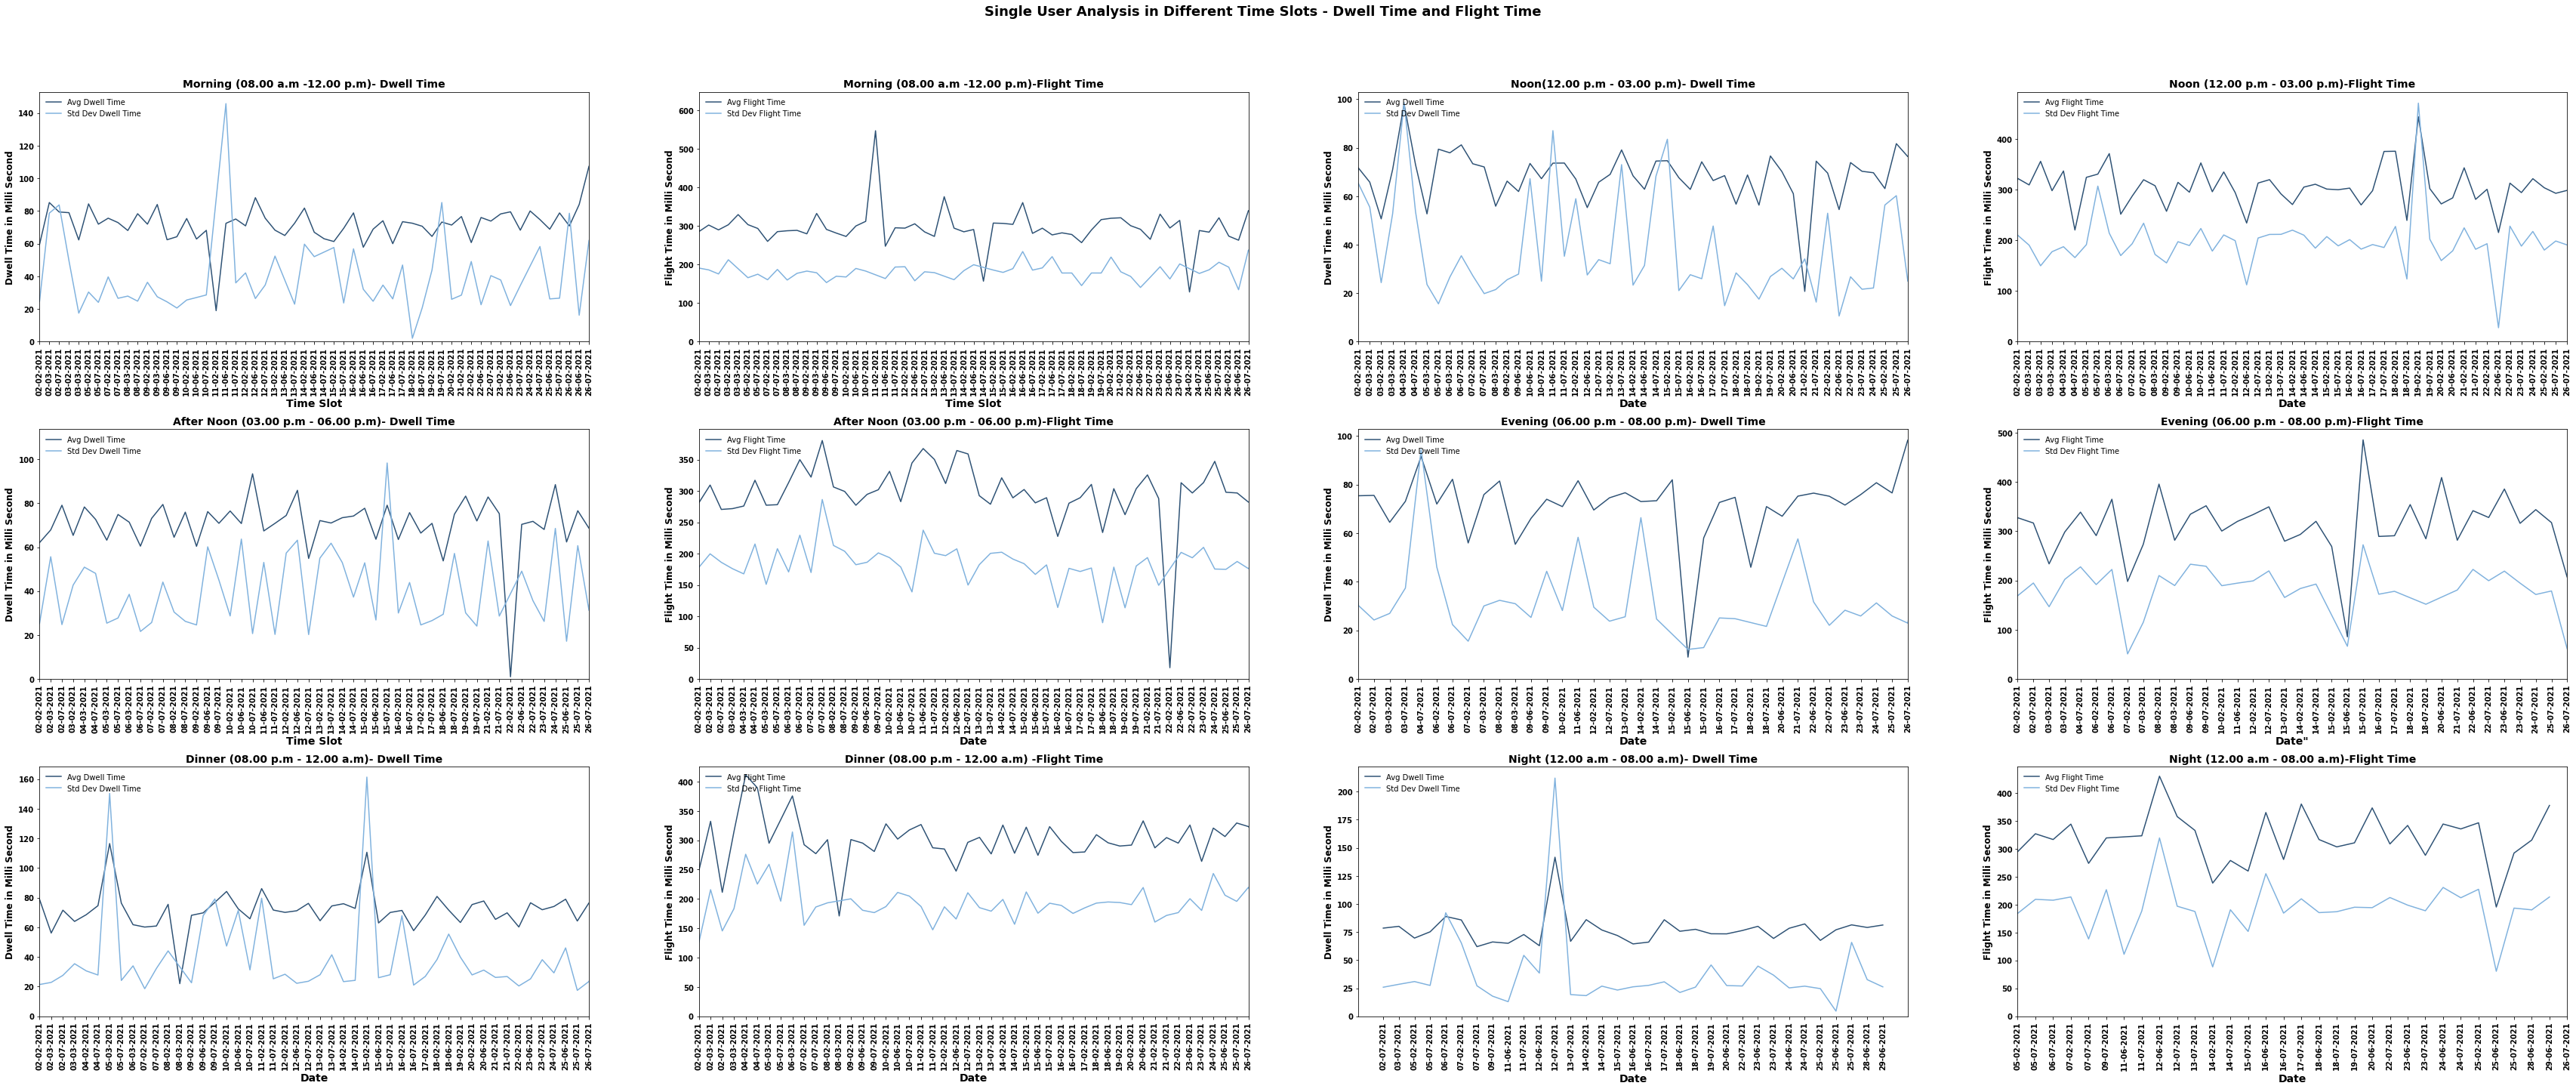

In [ ]:
#Single User Analysis in Different Timeslots- Dwell Time Vs Flight Time
fig=plt.figure(figsize=(60,20))
#set a figure title on top 
fig.suptitle('Single User Analysis in Different Time Slots - Dwell Time and Flight Time', fontsize = 18,fontweight='bold');
# set the spacing between subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
#############At Morning #########################################################
#Dwell Time
plt.subplot(3, 4, 1)#plt.subplot(#rows,#columns,Plot no)
plt.title('Morning (08.00 a.m -12.00 p.m)- Dwell Time', size = 14,fontweight='bold');
plt.xlabel('Time Slot', size = 14,fontweight='bold')
plt.ylabel('Dwell Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax1 = sns.lineplot(x="event_date", y="avg_dwell_time",color='#2E5275', data=df_event_morning,label='Avg Dwell Time', dashes=False)
ax1 = sns.lineplot(x="event_date", y="sd_dwell_time",color='#80B2DE', data=df_event_morning,label='Std Dev Dwell Time', dashes=False)
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 90) 
ax1.set_xlim(['02-02-2021', '26-07-2021'])
ax1.set_ylim([0, None])
ax1.legend(loc='upper left',frameon=False)
#Flight Time
plt.subplot(3, 4, 2)
plt.title('Morning (08.00 a.m -12.00 p.m)-Flight Time', size = 14,fontweight='bold');
plt.xlabel('Time Slot', size = 14,fontweight='bold')
plt.ylabel('Flight Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax2= sns.lineplot(x="event_date", y="avg_flight_time",color='#2E5275', data=df_event_morning,label='Avg Flight Time', dashes=False)
ax2 = sns.lineplot(x="event_date", y="sd_flight_time",color='#80B2DE', data=df_event_morning,label='Std Dev Flight Time', dashes=False)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 90) 
ax2.set_xlim(['02-02-2021', '26-07-2021'])
ax2.set_ylim([0, None])
ax2.legend(loc='upper left', frameon=False)

######################################################################################################################################################
#################################At Noon ####################################################
#Dwell Time
plt.subplot(3, 4, 3)#plt.subplot(#rows,#columns,Plot no)
plt.title('Noon(12.00 p.m - 03.00 p.m)- Dwell Time', size = 14,fontweight='bold');
plt.xlabel('Date', size = 14,fontweight='bold')
plt.ylabel('Dwell Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax3 = sns.lineplot(x="event_date", y="avg_dwell_time",color='#2E5275', data=df_event_noon,label='Avg Dwell Time', dashes=False)
ax3 = sns.lineplot(x="event_date", y="sd_dwell_time",color='#80B2DE', data=df_event_noon,label='Std Dev Dwell Time', dashes=False)
# Puts x-axis labels on an angle
ax3.xaxis.set_tick_params(rotation = 90) 
ax3.set_xlim(['02-02-2021', '26-07-2021'])
ax3.set_ylim([0, None])
ax3.legend(loc='upper left', frameon=False)
#Flight Time
plt.subplot(3, 4, 4)
plt.title('Noon (12.00 p.m - 03.00 p.m)-Flight Time', size = 14,fontweight='bold');
plt.xlabel('Date', size = 14,fontweight='bold')
plt.ylabel('Flight Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax4= sns.lineplot(x="event_date", y="avg_flight_time",color='#2E5275', data=df_event_noon,label='Avg Flight Time', dashes=False)
ax4 = sns.lineplot(x="event_date", y="sd_flight_time",color='#80B2DE', data=df_event_noon,label='Std Dev Flight Time', dashes=False)
# Puts x-axis labels on an angle
ax4.xaxis.set_tick_params(rotation = 90) 
ax4.set_xlim(['02-02-2021', '26-07-2021'])
ax4.set_ylim([0, None])
ax4.legend(loc='upper left', frameon=False)
#######################################################################################################################################
#################################################At After Noon####################################################################
#Dwell Time
plt.subplot(3, 4, 5)#plt.subplot(#rows,#columns,Plot no)
plt.title('After Noon (03.00 p.m - 06.00 p.m)- Dwell Time', size = 14,fontweight='bold');
plt.xlabel('Time Slot', size = 14,fontweight='bold')
plt.ylabel('Dwell Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax5 = sns.lineplot(x="event_date", y="avg_dwell_time",color='#2E5275', data=df_event_afternoon,label='Avg Dwell Time', dashes=False)
ax5 = sns.lineplot(x="event_date", y="sd_dwell_time",color='#80B2DE', data=df_event_afternoon,label='Std Dev Dwell Time', dashes=False)
# Puts x-axis labels on an angle
ax5.xaxis.set_tick_params(rotation = 90) 
ax5.set_xlim(['02-02-2021', '26-07-2021'])
ax5.set_ylim([0, None])
ax5.legend(loc='upper left', frameon=False)
#Flight Time
plt.subplot(3, 4, 6)
plt.title('After Noon (03.00 p.m - 06.00 p.m)-Flight Time', size = 14,fontweight='bold');
plt.xlabel('Date', size = 14,fontweight='bold')
plt.ylabel('Flight Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax6= sns.lineplot(x="event_date", y="avg_flight_time",color='#2E5275', data=df_event_afternoon,label='Avg Flight Time', dashes=False)
ax6 = sns.lineplot(x="event_date", y="sd_flight_time",color='#80B2DE', data=df_event_afternoon,label='Std Dev Flight Time', dashes=False)
# Puts x-axis labels on an angle
ax6.xaxis.set_tick_params(rotation = 90) 
ax6.set_xlim(['02-02-2021', '26-07-2021'])
ax6.set_ylim([0, None])
ax6.legend(loc='upper left', frameon=False)
##################################################################################################################################################
#######################################At Evening#################################################################################################
#Dwell Time
plt.subplot(3, 4, 7)#plt.subplot(#rows,#columns,Plot no)
plt.title('Evening (06.00 p.m - 08.00 p.m)- Dwell Time', size = 14,fontweight='bold');
plt.xlabel('Date', size = 14,fontweight='bold')
plt.ylabel('Dwell Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax7= sns.lineplot(x="event_date", y="avg_dwell_time",color='#2E5275', data=df_event_eve,label='Avg Dwell Time', dashes=False)
ax7 = sns.lineplot(x="event_date", y="sd_dwell_time",color='#80B2DE', data=df_event_eve,label='Std Dev Dwell Time', dashes=False)
# Puts x-axis labels on an angle
ax7.xaxis.set_tick_params(rotation = 90) 
ax7.set_xlim(['02-02-2021', '26-07-2021'])
ax7.set_ylim([0, None])
ax7.legend(loc='upper left', frameon=False)
#Flight Time
plt.subplot(3, 4, 8)
plt.title('Evening (06.00 p.m - 08.00 p.m)-Flight Time', size = 14,fontweight='bold');
plt.xlabel('Date"', size = 14,fontweight='bold')
plt.ylabel('Flight Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax8= sns.lineplot(x="event_date", y="avg_flight_time",color='#2E5275', data=df_event_eve,label='Avg Flight Time', dashes=False)
ax8 = sns.lineplot(x="event_date", y="sd_flight_time",color='#80B2DE', data=df_event_eve,label='Std Dev Flight Time', dashes=False)
# Puts x-axis labels on an angle
ax8.xaxis.set_tick_params(rotation = 90) 
ax8.set_xlim(['02-02-2021', '26-07-2021'])
ax8.set_ylim([0, None])
ax8.legend(loc='upper left', frameon=False)
######################################################################################################################################
###########################################At Dinner###############################################################################
#Dwell Time
plt.subplot(3, 4, 9)#plt.subplot(#rows,#columns,Plot no)
plt.title('Dinner (08.00 p.m - 12.00 a.m)- Dwell Time', size = 14,fontweight='bold');
plt.xlabel('Date', size = 14,fontweight='bold')
plt.ylabel('Dwell Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax9= sns.lineplot(x="event_date", y="avg_dwell_time",color='#2E5275', data=df_event_dinner,label='Avg Dwell Time', dashes=False)
ax9 = sns.lineplot(x="event_date", y="sd_dwell_time",color='#80B2DE', data=df_event_dinner,label='Std Dev Dwell Time', dashes=False)
# Puts x-axis labels on an angle
ax9.xaxis.set_tick_params(rotation = 90) 
ax9.set_xlim(['02-02-2021', '26-07-2021'])
ax9.set_ylim([0, None])
ax9.legend(loc='upper left', frameon=False)
#Flight Time
plt.subplot(3, 4, 10)
plt.title('Dinner (08.00 p.m - 12.00 a.m) -Flight Time', size = 14,fontweight='bold');
plt.xlabel('Date', size = 14,fontweight='bold')
plt.ylabel('Flight Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax10= sns.lineplot(x="event_date", y="avg_flight_time",color='#2E5275', data=df_event_dinner,label='Avg Flight Time', dashes=False)
ax10 = sns.lineplot(x="event_date", y="sd_flight_time",color='#80B2DE', data=df_event_dinner,label='Std Dev Flight Time', dashes=False)
# Puts x-axis labels on an angle
ax10.xaxis.set_tick_params(rotation = 90) 
ax10.set_xlim(['02-02-2021', '26-07-2021'])
ax10.set_ylim([0, None])
ax10.legend(loc='upper left', frameon=False)
###########################################################################################################################################################
###################################################At Night###################################################################################################
#Dwell Time
plt.subplot(3, 4, 11)#plt.subplot(#rows,#columns,Plot no)
plt.title('Night (12.00 a.m - 08.00 a.m)- Dwell Time', size = 14,fontweight='bold');
plt.xlabel('Date', size = 14,fontweight='bold')
plt.ylabel('Dwell Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax11= sns.lineplot(x="event_date", y="avg_dwell_time",color='#2E5275', data=df_event_night,label='Avg Dwell Time', dashes=False)
ax11 = sns.lineplot(x="event_date", y="sd_dwell_time",color='#80B2DE', data=df_event_night,label='Std Dev Dwell Time', dashes=False)
# Puts x-axis labels on an angle
ax11.xaxis.set_tick_params(rotation = 90) 
#ax11.set_xlim(['05-02-2021', '26-07-2021'])
ax11.set_ylim([0, None])
ax11.legend(loc='upper left', frameon=False)
#Flight Time
plt.subplot(3, 4, 12)
plt.title('Night (12.00 a.m - 08.00 a.m)-Flight Time', size = 14,fontweight='bold');
plt.xlabel('Date', size = 14,fontweight='bold')
plt.ylabel('Flight Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax12= sns.lineplot(x="event_date", y="avg_flight_time",color='#2E5275', data=df_event_night,label='Avg Flight Time', dashes=False)
ax12 = sns.lineplot(x="event_date", y="sd_flight_time",color='#80B2DE', data=df_event_night,label='Std Dev Flight Time', dashes=False)
# Puts x-axis labels on an angle
ax12.xaxis.set_tick_params(rotation = 90) 
ax12.set_xlim(['05-02-2021', '26-07-2021'])
ax12.set_ylim([0, None])
ax12.legend(loc='upper left', frameon=False)
plt.savefig('Timeslot_DwellTime_FlightTime.jpeg')

In [ ]:
#group by week day
df_event_day=df_event.groupby(
    ['event_day']
).agg(avg_dwell_time=('dwell_time_ms',np.mean),sd_dwell_time=('dwell_time_ms',np.std),
      avg_flight_time=('flight_time_ms',np.mean),sd_flight_time=('flight_time_ms',np.std)).reset_index()
df_event_day

,event_day,avg_dwell_time,sd_dwell_time,avg_flight_time,sd_flight_time
0,0,75.258884,50.796106,304.906366,191.016778
1,1,67.634571,46.487333,281.287258,197.269668
2,2,72.655240,47.320394,300.394210,191.399941
3,3,71.700541,43.744038,299.699093,188.902854
4,4,72.363391,51.263437,296.785782,188.770119
5,5,71.824272,45.710306,298.539530,190.908724
6,6,75.691865,46.091816,314.389230,189.102634


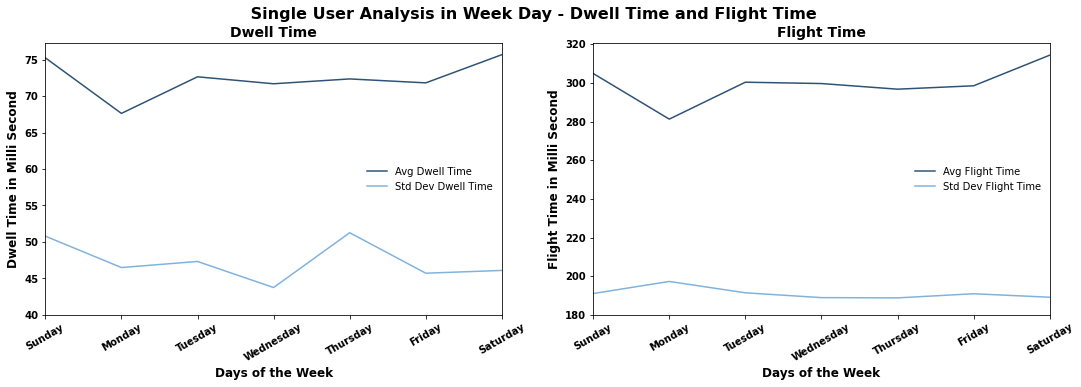

In [ ]:
fig=plt.figure(figsize=(18,5))
#set a figure title on top 
plt.suptitle(' Single User Analysis in Week Day - Dwell Time and Flight Time',fontsize = 16,fontweight='bold' );
#Dwell Time
plt.subplot(1, 2, 1)
plt.title('Dwell Time', size = 14,fontweight='bold');
plt.xlabel('Days of the Week', size = 12,fontweight='bold')
plt.ylabel('Dwell Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks([0,1, 2,3,4,5,6], ['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'],size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax1 = sns.lineplot(x="event_day", y="avg_dwell_time",color='#2E5275', data=df_event_day,label='Avg Dwell Time', dashes=False)
ax1 = sns.lineplot(x="event_day", y="sd_dwell_time",color='#80B2DE', data=df_event_day,label='Std Dev Dwell Time', dashes=False)
ax1.legend(loc='center right', frameon=False)
ax1.set_xlim([0,6])
ax1.set_ylim([40, None])
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 30) 
#Flight Time
plt.subplot(1, 2, 2)
plt.title('Flight Time', size = 14,fontweight='bold');
plt.xlabel('Days of the Week', size = 12,fontweight='bold')
plt.ylabel('Flight Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks([0,1, 2,3,4,5,6], ['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'],size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax2 = sns.lineplot(x="event_day", y="avg_flight_time",color='#2E5275', data=df_event_day,label='Avg Flight Time',dashes=False)
ax2 = sns.lineplot(x="event_day", y="sd_flight_time",color='#80B2DE', data=df_event_day,label='Std Dev Flight Time',  dashes=False)
ax2.legend(loc='center right', frameon=False)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 30)  
ax2.set_xlim([0,6])
ax2.set_ylim([180, None])
plt.savefig('WeekDays_DwellTime_FlightTime.jpeg')

In [ ]:
#group by date
df_event_date=df_event.groupby(
    ['event_date']
).agg(avg_dwell_time=('dwell_time_ms',np.mean),sd_dwell_time=('dwell_time_ms',np.std),
      avg_flight_time=('flight_time_ms',np.mean),sd_flight_time=('flight_time_ms',np.std)).reset_index()
df_event_date

,event_date,avg_dwell_time,sd_dwell_time,avg_flight_time,sd_flight_time
0,01-03-2021,46.380935,34.981832,181.574163,178.250569
1,01-07-2021,80.496474,62.318020,295.478138,183.401188
2,02-02-2021,69.323065,50.950197,305.720511,194.907794
3,02-03-2021,68.752101,58.597387,310.326331,194.331598
4,02-07-2021,77.547619,58.510663,299.541126,184.784818
...,...,...,...,...,...
75,27-06-2021,75.322034,61.882700,305.933988,187.525872
76,28-02-2021,66.418118,28.056376,254.560976,166.130275
77,28-06-2021,77.226415,54.533163,313.201258,192.754758
78,29-06-2021,71.300926,23.789331,340.203704,198.318971


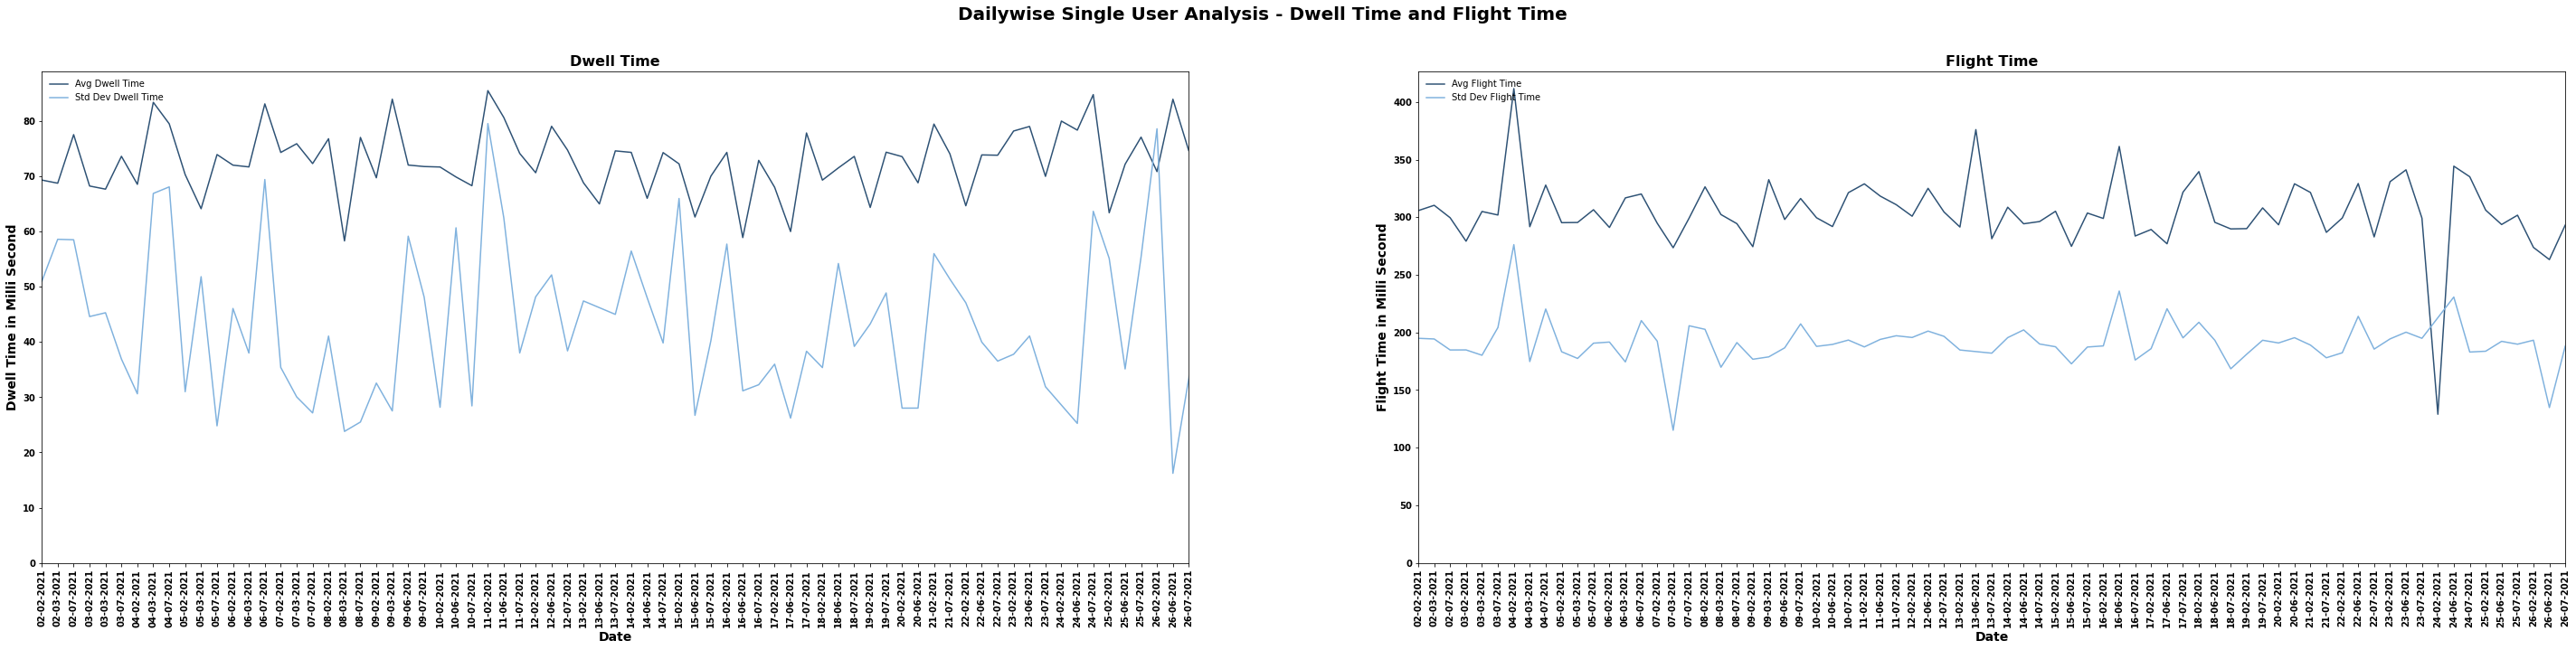

In [ ]:
fig=plt.figure(figsize=(50,10))
#set a figure title on top 
fig.suptitle('Dailywise Single User Analysis - Dwell Time and Flight Time', fontsize = 20,fontweight='bold' );
#Dwell Time
plt.subplot(1, 2, 1)
plt.title('Dwell Time', size = 16,fontweight='bold');
plt.xlabel('Date', size = 14,fontweight='bold')
plt.ylabel('Dwell Time in Milli Second', size = 14,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax1 = sns.lineplot(x="event_date", y="avg_dwell_time",color='#2E5275',label='Avg Dwell Time', data=df_event_date,dashes=False)
ax1 = sns.lineplot(x="event_date", y="sd_dwell_time",color='#80B2DE',label='Std Dev Dwell Time', data=df_event_date,dashes=False)
ax1.legend(loc='upper left', frameon=False)
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 90) 
ax1.set_xlim(['02-02-2021', '26-07-2021'])
ax1.set_ylim([0, None])
#Flight Time
plt.subplot(1, 2, 2)
plt.title('Flight Time', size = 16,fontweight='bold');
plt.xlabel('Date', size = 14,fontweight='bold')
plt.ylabel('Flight Time in Milli Second', size = 14,fontweight='bold') 
plt.xticks(size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax2 = sns.lineplot(x="event_date", y="avg_flight_time",color='#2E5275',label='Avg Flight Time', data=df_event_date, dashes=False)
ax2 = sns.lineplot(x="event_date", y="sd_flight_time",color='#80B2DE',label='Std Dev Flight Time', data=df_event_date, dashes=False)
ax2.legend(loc='upper left', frameon=False)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 90)  
ax2.set_xlim(['02-02-2021', '26-07-2021'])
ax2.set_ylim([0, None])
plt.savefig('Dailywise_DwellTime_FlightTime.jpeg')

In [ ]:
#group by month
df_event_month1=df_event.groupby(
    ['event_month']
).agg(avg_dwell_time=('dwell_time_ms',np.mean),sd_dwell_time=('dwell_time_ms',np.std),
      avg_flight_time=('flight_time_ms',np.mean),sd_flight_time=('flight_time_ms',np.std)).reset_index()
#add extra rows for  event_month in April  and May with values avg_dwell_time=	sd_dwell_time=	avg_flight_time	=sd_flight_time=0
df_event_month2 = pd.DataFrame({"event_month":[4,5],
                    "avg_dwell_time":[0,0],
                    "sd_dwell_time":[0,0],
                    "avg_flight_time":[0,0],
                    "sd_flight_time":[0,0]})      
df_event_month2
# to append df2 at the end of df1 dataframe
df_event_month=(df_event_month1.append(df_event_month2)).sort_values(by="event_month", ascending=True).reset_index()
df_event_month


,index,event_month,avg_dwell_time,sd_dwell_time,avg_flight_time,sd_flight_time
0,0,2,71.081011,46.680990,298.972363,190.072099
1,1,3,61.032160,43.690647,261.239614,189.209008
2,0,4,0.000000,0.000000,0.000000,0.000000
3,1,5,0.000000,0.000000,0.000000,0.000000
4,2,6,73.795783,52.581758,310.370897,195.446237
5,3,7,74.957566,45.001086,301.775638,190.700902


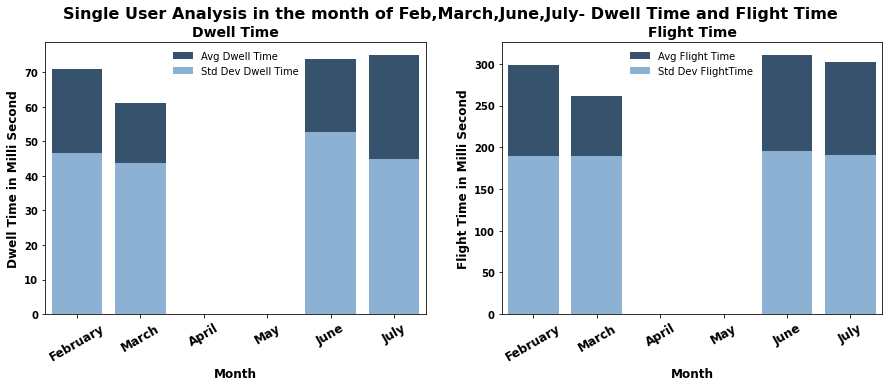

In [ ]:

fig=plt.figure(figsize=(15,5))
#set a figure title on top 
fig.suptitle('Single User Analysis in the month of Feb,March,June,July- Dwell Time and Flight Time', fontsize = 16,fontweight='bold' );
#Dwell Time
plt.subplot(1, 2, 1)
plt.title('Dwell Time', size = 14,fontweight='bold');
ax1 = sns.barplot(x="event_month", y="avg_dwell_time",color='#2E5275', data=df_event_month,label='Avg Dwell Time')
ax1 = sns.barplot(x="event_month", y="sd_dwell_time",color='#80B2DE', data=df_event_month,label='Std Dev Dwell Time')
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 30) 
ax1.set_xticklabels(['February','March', 'April', 'May','June','July'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')
ax1.set_xlabel('Month',size=12,fontweight='bold')
ax1.set_ylabel('Dwell Time in Milli Second',size=12,fontweight='bold')
ax1.legend(loc='upper center', frameon=False)
#Flight Time
plt.subplot(1, 2, 2)
plt.title('Flight Time', size = 14,fontweight='bold');
ax2 = sns.barplot(x="event_month", y="avg_flight_time",color='#2E5275', data=df_event_month,label='Avg Flight Time',)
ax2 = sns.barplot(x="event_month", y="sd_flight_time",color='#80B2DE',data=df_event_month,label='Std Dev FlightTime')
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 30) 
ax2.set_xticklabels(['February','March', 'April', 'May','June','July'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')
ax2.set_xlabel('Month',size=12,fontweight='bold')
ax2.set_ylabel('Flight Time in Milli Second',size=12,fontweight='bold')
ax2.legend(loc='upper center', frameon=False)

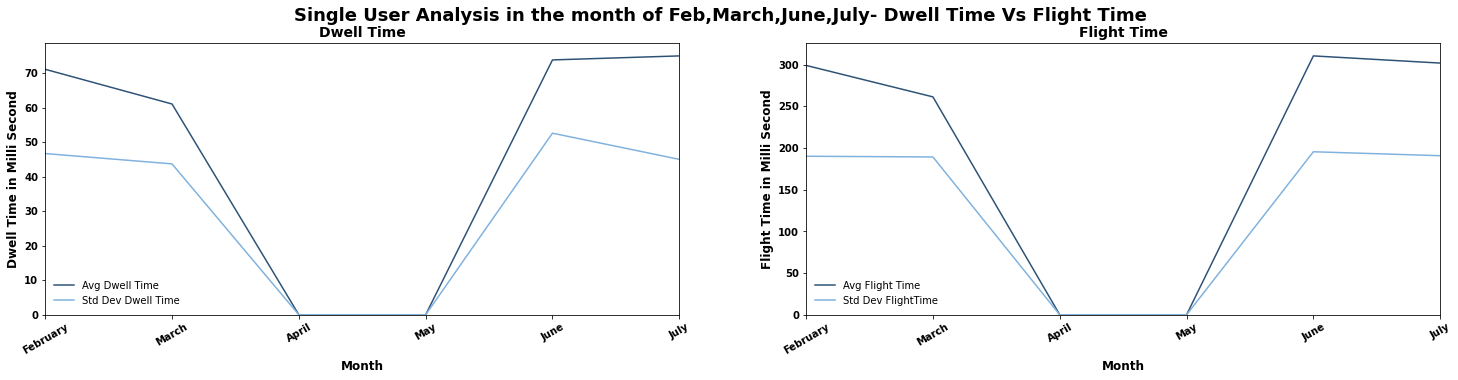

In [ ]:
fig=plt.figure(figsize=(25,5))
#set a figure title on top 
fig.suptitle('Single User Analysis in the month of Feb,March,June,July- Dwell Time Vs Flight Time', fontsize = 18,fontweight='bold' );
#Dwell Time
plt.subplot(1, 2, 1)
plt.title('Dwell Time', size = 14,fontweight='bold');
plt.xlabel('Month', size = 12,fontweight='bold')
plt.ylabel('Dwell Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks([2,3,4,5,6,7], ['February','March', 'April', 'May','June','July'],size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax1 = sns.lineplot(x="event_month", y="avg_dwell_time",color='#2E5275',label='Avg Dwell Time', data=df_event_month,dashes=False)
ax1 = sns.lineplot(x="event_month", y="sd_dwell_time",color='#80B2DE',label='Std Dev Dwell Time', data=df_event_month,dashes=False)
ax1.set_xlim([2,7])
ax1.set_ylim([0, None])
# Format the date into months & days
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.legend(loc='best', frameon=False)
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 30) 
#Flight Time
plt.subplot(1, 2, 2)
plt.title('Flight Time', size = 14,fontweight='bold');
plt.xlabel('Month', size = 12,fontweight='bold')
plt.ylabel('Flight Time in Milli Second', size = 12,fontweight='bold') 
plt.xticks([ 2,3,4,5,6,7], ['February','March', 'April', 'May','June','July'],size=10,fontweight='bold')
plt.yticks(size=10,fontweight='bold')
ax2 = sns.lineplot(x="event_month", y="avg_flight_time",color='#2E5275', data=df_event_month,label='Avg Flight Time', dashes=False)
ax2 = sns.lineplot(x="event_month", y="sd_flight_time",color='#80B2DE',label='Std Dev FlightTime', data=df_event_month, dashes=False)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 30)  
ax2.legend(loc='best', frameon=False)
ax2.set_xlim([2,7])
ax2.set_ylim([0, None])
plt.savefig('Month_DwellTime_FlightTime.jpeg')